# Workflows

`NiSpace` incorporates very detailed and customizable functionality to perform colocalization analyses. However, to provide an quick-and-easy access, we defined "workflow" functions that perform complete colocalization pipelines with only one command. These include:

`nispace.workflows.simple_colocalization()`:  
"Does a map of interest colocalize with a reference dataset?" (permutation of maps)

`nispace.workflows.group_comparison()`:  
"Do brain alteration pattern relative to a control cohort colocalize with a reference dataset?" (permutation of groups)

`nispace.workflows.simple_xsea()`:  
"Is the (average) colocalization with a specific set of reference maps higher than if these sets were randomly drawn from a larger "population" of maps?" ("X-Set Enrichment Analysis", permutation of sets)


In [1]:
# monkey patch to make progress bars show as ASCII instead of as widgets
import tqdm.notebook
tqdm.notebook.tqdm = tqdm.tqdm

## Simple colocalization

The simplest case would be: You have a group-level results map, for example a SPM t-contrast map, and are interested in whether this map (i.e., the group or session differences) is associated with neurotransmitter receptor distributions.
The workflow function `simple_colocalization()` will take your results map and a reference dataset of neurotransmitter receptor maps as input, return the colocalization statistics including non-parametric p values, and visualize the results. Internally, this is just calling the individual `NiSpace` functions in order.

Here, we use an ENIGMA cortical thickness effect size map (Cohen's d) from a schizophrenia case-control comparisons as our input ("target") map. ENIGMA data are available in the 68-parcel cortical Desikan-Killiany parcellation. Of note, this would also work when passing a 2d dataframe is input (i.e., parcels in the columns, and different maps in the rows). It also works with a list of images as input.

We could, but do not have to, pass pre-loaded reference data to `simple_colocalization()`. With `x = "pet"`, it will automatically call `fetch_reference("pet")` internally. A collection can be passed through `x_collection`, defaulting to `"UniqueTracers"`.

In [2]:
from nispace.datasets import fetch_example
from nispace.workflows import simple_colocalization

# get the example
example_enigma = fetch_example("enigma")
example_enigma = example_enigma.loc["SCZ"]
print("A pd.Series with SCZ-vs.-control effect sizes for 68 Desikan-Killiany parcels:")
display(example_enigma)

# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = simple_colocalization(
    x="PET",
    y=example_enigma,
    z="gm", # don't control for anything on map-level
    parcellation="DesikanKilliany",
    colocalization_method="spearman", # can be any allowed method
    n_perm=10000, # 10k permutations, this is the default
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
)

INFO | 27/09/24 16:53:32 | nispace: Loading example dataset: 'enigma'. The data was parcellated with: 'DesikanKilliany'.
A pd.Series with SCZ-vs.-control effect sizes for 68 Desikan-Killiany parcels:


L_bankssts                  -0.352
L_caudalanteriorcingulate   -0.119
L_caudalmiddlefrontal       -0.363
L_cuneus                    -0.203
L_entorhinal                -0.203
                             ...  
R_supramarginal             -0.386
R_frontalpole               -0.207
R_temporalpole              -0.236
R_transversetemporal        -0.262
R_insula                    -0.406
Name: SCZ, Length: 68, dtype: float64

INFO | 27/09/24 16:53:32 | nispace: Using integrated parcellation DesikanKilliany.
INFO | 27/09/24 16:53:32 | nispace: Loading integrated pet dataset as X data.
INFO | 27/09/24 16:53:32 | nispace: Using collection UniqueTracers.
INFO | 27/09/24 16:53:32 | nispace: Loading pet maps.
INFO | 27/09/24 16:53:32 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-UniqueTracers.collect.
INFO | 27/09/24 16:53:32 | nispace: Loading parcellated data: DesikanKilliany
The NiSpace "PET" dataset is based on openly available nuclear imaging maps largely accessed via neuromaps 
(https://neuromaps-main.readthedocs.io/). The maps are downloaded via neuromaps, processed on-the-fly, and cached locally 
(find them in `~HOME/nispace-data/reference/pet/map`). The accompanying metadata table contains detailed information about 
tracers, source samples, original publications and data sources, as well as the publication licenses. Every map should be 
cited when used.

Parcellating (-1 proc): 100%|██████████| 1/1 [00:00<00:00, 45.24it/s]


INFO | 27/09/24 16:53:38 | nispace: Combined across images, 0 parcel(s) had only background intensity and were set to nan ([]).
INFO | 27/09/24 16:53:38 | nispace: Got 'z' data for 1 x 68 parcels.
INFO | 27/09/24 16:53:38 | nispace: Z-standardizing 'X' data.
INFO | 27/09/24 16:53:38 | nispace: Z-standardizing 'Z' data.
INFO | 27/09/24 16:53:38 | nispace: *** NiSpace.colocalize() - Estimating X & Y colocalizations. ***
INFO | 27/09/24 16:53:38 | nispace: Running 'spearman' colocalization.
INFO | 27/09/24 16:53:38 | nispace: Will regress Z from Y before colocalization calculation.
INFO | 27/09/24 16:53:38 | nispace: Found equal number of Z and Y maps. Will perform map-wise regression.


Colocalizing (spearman, -1 proc): 100%|██████████| 1/1 [00:00<00:00, 1239.09it/s]


INFO | 27/09/24 16:53:43 | nispace: *** NiSpace.permute() - Estimate exact non-parametric p values. ***
INFO | 27/09/24 16:53:43 | nispace: Permutation of: X maps.
INFO | 27/09/24 16:53:43 | nispace: Loading observed colocalizations (method = 'spearman').
INFO | 27/09/24 16:53:43 | nispace: Generating permuted X maps.
INFO | 27/09/24 16:53:43 | nispace: No null maps found.
INFO | 27/09/24 16:53:43 | nispace: Generating null maps (n = 10000, null_method = 'moran').
INFO | 27/09/24 16:53:43 | nispace: Null map generation: Assuming n = 27 data vector(s) for n = 68 parcels.
INFO | 27/09/24 16:53:43 | nispace: Using provided distance matrix/matrices.


Moran null maps (-1 proc): 100%|██████████| 27/27 [00:00<00:00, 310.88it/s]


INFO | 27/09/24 16:53:45 | nispace: Null data generation finished.
INFO | 27/09/24 16:53:45 | nispace: Z-standardizing null maps.


Null colocalizations (spearman, -1 proc): 100%|██████████| 10000/10000 [00:02<00:00, 4520.45it/s]


INFO | 27/09/24 16:53:51 | nispace: Calculating exact p-values (tails = {'rho': 'two'}).
INFO | 27/09/24 16:53:51 | nispace: *** NiSpace.correct_p() - Correct p values for multiple comparisons. ***
INFO | 27/09/24 16:53:51 | nispace: Returning colocalizations: 
| METHOD   | XSEA  | X_REDUCTION | Y_TRANSFORM | 
| spearman | False | False       | False       | 
INFO | 27/09/24 16:53:51 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | xmaps        | False | None      | False | False       | False       | 
INFO | 27/09/24 16:53:51 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | xmaps        | False | fdrbh     | False | False       | False       | 


Results will be 2d dataframes with Spearman coefficients, p-values, and q-values. The dataframes will have shape (1,n_parcels) as we passed one map only. We concatenate them for nice display:

In [3]:
import pandas as pd

# concatenate
simple_results = pd.concat([colocs, p_values, q_values], keys=["rho", "p", "q"])
# reorder levels
simple_results = simple_results.reorder_levels([1,0]).sort_index()
# show
display(simple_results.head(5))

set                                                                 General  \
map     target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castrillon2023_space-mni152   
SCZ p                                             0.688000                    
    q                                             0.813946                    
    rho                                          -0.086600                    

set                                                                      \
map     target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016_space-mni152   
SCZ p                                              0.88640                
    q                                              0.88640                
    rho                                            0.01821                

set                                                                        \
map     target-HDAC_tracer-martinostat_n-8_dx-hc_pub-wey2016_space-mni152   
SCZ p                                             0.783800                  
    q                                             0.813946                  
    rho                                           0.064601                  

set                                                         Immunity  \
map     target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018_space-mni152   
SCZ p                                             0.629600             
    q                                             0.813946             
    rho                                          -0.100925             

set                                                                  \
map     target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020_space-mni152   
SCZ p                                             0.629200            
    q                                             0.813946            
    rho                                           0.078183            

set                                                             Glutamate  \
map     target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smart2019_space-mni152   
SCZ p                                             0.287600                  
    q                                             0.705927                  
    rho                                          -0.179874                  

set                                                                       \
map     target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021_space-mni152   
SCZ p                                             0.037000                 
    q                                             0.589500                 
    rho                                          -0.461504                 

set                                                                    GABA  \
map     target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lukow2022_space-mni152   
SCZ p                                              0.08120                    
    q                                              0.58950                    
    rho                                           -0.17688                    

set                                                                           \
map     target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-dukart2018_space-mni152   
SCZ p                                             0.392200                     
    q                                             0.813946                     
    rho                                          -0.171372                     

set                                                                       Dopamine  \
map     target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-garciagomez2018_space-mni152   
SCZ p                                             0.517800                           
    q                                             0.813946                           
    rho                                          -0.117265                           

set      ...  \
map      ...   
SCZ p    ...   
    q    ...   
    rho  ...   

set                                              

Okay, let's look at the lowest p values for schizophrenia:

In [4]:
simple_results.T.sort_values(by=("SCZ", "p"))

SCZ  \
                                                                                     p   
set                         map                                                          
Glutamate                   target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...  0.0370   
GABA                        target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.0812   
Opiods/Endocannabinoids     target-MOR_tracer-carfentanil_n-204_dx-hc_pub-k...  0.0966   
                            target-KOR_tracer-ly2795050_n-28_dx-hc_pub-vija...  0.1224   
Serotonin                   target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...  0.1296   
                            target-5HT2a_tracer-altanserin_n-19_dx-hc_pub-s...  0.1310   
Opiods/Endocannabinoids     target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.1728   
Dopamine                    target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.2464   
Serotonin                   target-5HTT_tracer-dasb_n-18_dx-hc_pub-savli201...  0.2616   
                            target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.2744   
Glutamate                   target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...  0.2876   
Noradrenaline/Acetylcholine target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.3446   
GABA                        target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-du...  0.3922   
Serotonin                   target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa...  0.4554   
Dopamine                    target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.5178   
                            target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.5194   
                            target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2...  0.5812   
Immunity                    target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020_...  0.6292   
                            target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018...  0.6296   
Serotonin                   target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli20...  0.6376   
Noradrenaline/Acetylcholine target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...  0.6446   
General                     target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castril...  0.6880   
Histamine                   target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...  0.7140   
Noradrenaline/Acetylcholine target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naga...  0.7252   
                            target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010_s...  0.7626   
General                     target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...  0.7838   
                            target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2...  0.8864   

                                                                                          \
                                                                                       q   
set                         map                                                            
Glutamate                   target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...  0.589500   
GABA                        target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.589500   
Opiods/Endocannabinoids     target-MOR_tracer-carfentanil_n-204_dx-hc_pub-k...  0.589500   
                            target-KOR_tracer-ly2795050_n-28_dx-hc_pub-vija...  0.589500   
Serotonin                   target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...  0.589500   
                            target-5HT2a_tracer-altanserin_n-19_dx-hc_pub-s...  0.589500   
Opiods/Endocannabinoids     target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.666514   
Dopamine                    target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.705927   
Serotonin                   target-5HTT_tracer-dasb_n-18_dx-hc_pub-savli201...  0.705927   
                            target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.705927   
Glutamate                   target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...  0.705927   
Noradrenaline/Acetylcholine target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.775350   
GA

We find the strongest colocalization between cortical thickness changes in SCZ and the NMDA glutamateric receptor distribution. 
The colocalization is negative, i.e., regions with negative effect sizes (SCZ < controls) have a high concentration of NMDA receptors. However, it is only marginally significant relative to null maps with a similar degree of spatial autocorrelation.

We can visualize this result with `NiSpace` by calling `.plot("categorical")` on the `NiSpace` instance returned by the workflow function:  
(bars are colocalization values, grey shades are the percentiles of the null distribution)

INFO | 27/09/24 16:53:51 | nispace: *** NiSpace.plot() - Plot colocalization results. ***
INFO | 27/09/24 16:53:52 | nispace: Creating categorical plot for method spearman, colocalization stat rho.


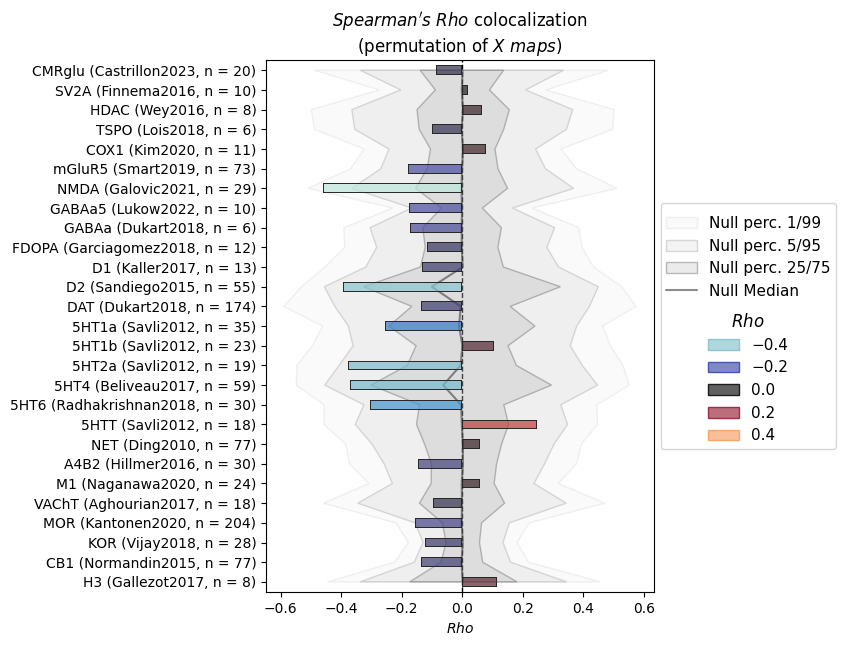

In [5]:
fig, ax, plot = nsp_object.plot("categorical")

## Group comparison

Implemented here via `nispace.workflows.group_comparison()`, this is the core functionality of the MATLAB [JuSpace](https://github.com/juryxy/JuSpace) package. The typical scenario would be: I have MRI images of two groups or sessions, which I want to compare against each other. Examples would be patients vs. controls (groups), old vs. young, (groups), the same subjects pre- vs post treatment (sessions), or during rest vs. during a task (sessions).

The approach applies the following principle: We take each subject's image, we calculate a group/session comparison statistic for each parcel, and then we calculate colocalization statistics using the parcel-wise group/session comparison values. The last part equals the `simple_colocalization()` method above. However, here, we have single-subject maps, so we can permute the groups instead of the maps, which actually better fits our null hypothesis and is less conservative.

We use the ABIDE example dataset. Here, we get parcellated data ("fALFF") for many ASD- and control-subjects along with phenotypic information.

The minimum data we have to provide is the parcellated data via "x" and the group information via "design". The framework is actually no GLM but is implemented in a GLM-style to match what people already use in neuroimaging analysis. So, the "design" should be a DataFrame with as many rows as there are subjects plus minimally a dummy column named "groups". Another specially treated column is "site" for scanner/study site. If we pass nothing else, everything including the "site" column will be regressed from the parcel-wise data. If we pass `combat = True`, ComBat harmonization will be used to remove site effects.

The group comparison method determines the output format. Following the ENIGMA example above, we can a group-level effect size (`"cohen(a,b)"`or `"hedges(a,b)"`), which will result in one group comparison map, which will be colocalized with the reference dataset. On the other hand, we can use `"zscore(a,b)"` to calculate z scores for every subject in group A (lowest value in the "group" design column) vs. mean and sd of group B. This will result in one map for every subject in group A, to be colocalized with the reference dataset. While we then could calculate one p value for every subject, the default is to calculate p values for the mean of all colocalization values across group-A-subject for easier interpretation.

Let's start with version 1 and `"hedges"`:

INFO | 27/09/24 17:01:59 | nispace: Loading example dataset: 'abide'. The data was parcellated with: 'Schaefer200'.
INFO | 27/09/24 17:01:59 | nispace: Returning parcellated and associated subject data.
A pd.DataFrame with single-subject values for 216 Schaefer/Melbourne parcels:


,1_RH_SC_aHIP,2_RH_SC_pHIP,3_RH_SC_lAMY,4_RH_SC_mAMY,5_RH_SC_THA-DP,6_RH_SC_THA-VP,7_RH_SC_THA-VA,8_RH_SC_THA-DA,9_RH_SC_NAc-shell,10_RH_SC_NAc-core,...,223_RH_CX_Default_PFCdPFCm_1,224_RH_CX_Default_PFCdPFCm_2,225_RH_CX_Default_PFCdPFCm_3,226_RH_CX_Default_PFCdPFCm_4,227_RH_CX_Default_PFCdPFCm_5,228_RH_CX_Default_PFCdPFCm_6,229_RH_CX_Default_PFCdPFCm_7,230_RH_CX_Default_pCunPCC_1,231_RH_CX_Default_pCunPCC_2,232_RH_CX_Default_pCunPCC_3
subject,,,,,,,,,,,,,,,,,,,,,
50003,0.554244,0.545724,0.540651,0.567798,0.565456,0.549855,0.575414,0.547232,0.556550,0.549233,...,0.511879,0.546551,0.572870,0.489960,0.481450,0.548910,0.553655,0.630450,0.624178,0.629993
50004,0.480016,0.507608,0.501729,0.479775,0.497517,0.496894,0.508031,0.504987,0.518331,0.529840,...,0.499219,0.514022,0.495265,0.535245,0.531300,0.530919,0.544821,0.531825,0.549992,0.583247
50005,0.498510,0.525765,0.504602,0.533165,0.526105,0.517529,0.539943,0.543338,0.560928,0.557962,...,0.539904,0.570698,0.539725,0.570238,0.521150,0.535021,0.549574,0.590597,0.604462,0.599347
50006,0.521442,0.536580,0.508965,0.523906,0.534811,0.522690,0.525827,0.522897,0.535364,0.525703,...,0.553780,0.543042,0.518454,0.561790,0.522045,0.552814,0.528958,0.580796,0.581530,0.590443
50007,0.540955,0.565601,0.538194,0.572868,0.570920,0.538686,0.572898,0.567324,0.581634,0.585195,...,0.584967,0.598638,0.561605,0.603095,0.533502,0.589898,0.550674,0.575307,0.609521,0.621164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51583,0.601393,0.612975,0.593897,0.598370,0.603990,0.628712,0.630596,0.612861,0.608473,0.629187,...,0.527415,0.604819,0.615474,0.633853,0.594164,0.629415,0.588908,0.623795,0.635083,0.664281
51584,0.588591,0.588835,0.614848,0.600857,0.612294,0.611754,0.612700,0.600363,0.605199,0.621433,...,0.534163,0.603108,0.600714,0.634309,0.609171,0.615166,0.625292,0.677136,0.687916,0.703988
51585,0.637348,0.643589,0.620320,0.640251,0.681362,0.708882,0.703848,0.705741,0.645280,0.636160,...,0.593494,0.663652,0.659141,0.666238,0.628687,0.666653,0.640163,0.671536,0.675054,0.712296


A pd.DataFrame for the design with group and site information in numerical format:


,groups,site,age,sex
subject,,,,
50003,1,9,24.45,1
50004,1,9,19.09,1
50005,1,9,13.73,2
50006,1,9,13.37,1
50007,1,9,17.78,1
...,...,...,...,...
51583,1,10,35.00,1
51584,1,10,49.00,1
51585,1,10,27.00,1


INFO | 27/09/24 17:01:59 | nispace: Using integrated parcellation Schaefer200.
INFO | 27/09/24 17:01:59 | nispace: Loading integrated pet dataset as X data.
INFO | 27/09/24 17:01:59 | nispace: Using collection UniqueTracers.
INFO | 27/09/24 17:01:59 | nispace: Loading pet maps.
INFO | 27/09/24 17:01:59 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-UniqueTracers.collect.
INFO | 27/09/24 17:01:59 | nispace: Loading parcellated data: Schaefer200
The NiSpace "PET" dataset is based on openly available nuclear imaging maps largely accessed via neuromaps 
(https://neuromaps-main.readthedocs.io/). The maps are downloaded via neuromaps, processed on-the-fly, and cached locally 
(find them in `~HOME/nispace-data/reference/pet/map`). The accompanying metadata table contains detailed information about 
tracers, source samples, original publications and data sources, as well as the publication licenses. Every map should be 
cited when used. The res

Parcellating (-1 proc): 100%|██████████| 1/1 [00:00<00:00, 1151.02it/s]


INFO | 27/09/24 17:02:07 | nispace: Combined across images, 0 parcel(s) had only background intensity and were set to nan ([]).
INFO | 27/09/24 17:02:07 | nispace: Got 'z' data for 1 x 232 parcels.
INFO | 27/09/24 17:02:07 | nispace: Z-standardizing 'X' data.
INFO | 27/09/24 17:02:07 | nispace: Z-standardizing 'Z' data.
INFO | 27/09/24 17:02:07 | nispace: Design matrix of shape (871, 4). Assuming 871 subjects/maps.


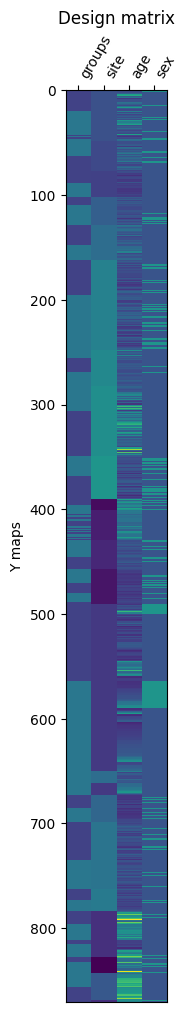

INFO | 27/09/24 17:02:07 | nispace: *** NiSpace.clean_y() - Y covariate regression. ***
INFO | 27/09/24 17:02:07 | nispace: Performing covariate regression between maps/subjects (e.g., age, sex, site).
INFO | 27/09/24 17:02:07 | nispace: Assuming 3 'between' covariate(s) for 871 maps/subjects.


Regressing 3 between covariate(s) on Y (-1 proc): 100%|██████████| 232/232 [00:03<00:00, 69.42it/s]


INFO | 27/09/24 17:02:13 | nispace: *** NiSpace.transform_y() - Y transformation and comparison. ***
INFO | 27/09/24 17:02:13 | nispace: Groups/sessions vector provided, ensuring dummy-coding.
INFO | 27/09/24 17:02:13 | nispace: Applying Y transform 'hedges(a,b)'.
INFO | 27/09/24 17:02:13 | nispace: *** NiSpace.colocalize() - Estimating X & Y colocalizations. ***
INFO | 27/09/24 17:02:13 | nispace: Running 'spearman' colocalization with 'hedges(a,b)' transform.
INFO | 27/09/24 17:02:13 | nispace: Will regress Z from Y before colocalization calculation.
INFO | 27/09/24 17:02:13 | nispace: Found equal number of Z and Y maps. Will perform map-wise regression.


Colocalizing (spearman, -1 proc): 100%|██████████| 1/1 [00:00<00:00, 1377.44it/s]


INFO | 27/09/24 17:02:14 | nispace: *** NiSpace.permute() - Estimate exact non-parametric p values. ***
INFO | 27/09/24 17:02:14 | nispace: Permutation of: Y groups.
INFO | 27/09/24 17:02:14 | nispace: Loading transformed Y data, transform = 'hedges(a,b)'.
INFO | 27/09/24 17:02:14 | nispace: Will calculate p values for mean calculation across Y maps. Set 'p_from_average_y_coloc' = False to change this behavior.
INFO | 27/09/24 17:02:14 | nispace: Loading observed colocalizations (method = 'spearman').
INFO | 27/09/24 17:02:14 | nispace: Generating permuted Y groups.
INFO | 27/09/24 17:02:14 | nispace: Permuting groups/sessions vector, strategy: unpaired, proportional.


Null colocalizations (spearman, -1 proc): 100%|██████████| 10000/10000 [00:02<00:00, 4734.21it/s]


INFO | 27/09/24 17:02:19 | nispace: Calculating exact p-values (tails = {'rho': 'two'}).
INFO | 27/09/24 17:02:20 | nispace: *** NiSpace.correct_p() - Correct p values for multiple comparisons. ***
INFO | 27/09/24 17:02:20 | nispace: Returning colocalizations: 
| METHOD   | XSEA  | X_REDUCTION | Y_TRANSFORM | 
| spearman | False | False       | hedges(a,b) | 
INFO | 27/09/24 17:02:20 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | groups       | False | None      | False | False       | hedges(a,b) | 
INFO | 27/09/24 17:02:20 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | groups       | False | fdrbh     | False | False       | hedges(a,b) | 


In [7]:
from nispace.datasets import fetch_example
from nispace.workflows import group_comparison

# get the example
example_abide, info_abide = fetch_example("abide")
print("A pd.DataFrame with single-subject values for 216 Schaefer/Melbourne parcels:")
display(example_abide)

# define the design
design = pd.DataFrame({
    "groups": info_abide["dx_num"],
    "site": info_abide["site_num"],
    "age": info_abide["age"],
    "sex": info_abide["sex_num"]
})
print("A pd.DataFrame for the design with group and site information in numerical format:")
display(design)

# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = group_comparison(
    x="PET",
    design=design,
    y=example_abide,
    z="gm", # control for standard gray matter probability on map-level
    parcellation="Schaefer200",
    colocalization_method="spearman", # can be any allowed method
    group_comparison="hedges(a,b)",
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
)

make a results df as above:

In [8]:
group_results = pd.concat([colocs, p_values, q_values], keys=["rho", "p", "q"])
# reorder levels
group_results = group_results.droplevel(1, axis=0)
# show strongest effect
display(group_results.T.sort_values(by="p"))

rho  \
set                         map                                                            
Opiods/Endocannabinoids     target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.371362   
                            target-MOR_tracer-carfentanil_n-204_dx-hc_pub-k...  0.338363   
Dopamine                    target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.352417   
GABA                        target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.178991   
Serotonin                   target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa...  0.192571   
                            target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.211501   
Histamine                   target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...  0.226422   
Opiods/Endocannabinoids     target-KOR_tracer-ly2795050_n-28_dx-hc_pub-vija...  0.155375   
Dopamine                    target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.150392   
                            target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.125354   
                            target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2...  0.160780   
GABA                        target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-du... -0.106015   
Noradrenaline/Acetylcholine target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.126459   
                            target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...  0.127835   
Immunity                    target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018...  0.105070   
General                     target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castril... -0.084467   
Immunity                    target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020_... -0.105642   
Serotonin                   target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli20... -0.095630   
Noradrenaline/Acetylcholine target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010_s... -0.054447   
General                     target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we... -0.050342   
Noradrenaline/Acetylcholine target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naga...  0.060871   
Glutamate                   target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...  0.067585   
Serotonin                   target-5HTT_tracer-dasb_n-18_dx-hc_pub-savli201...  0.071319   
                            target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...  0.040085   
Glutamate                   target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...  0.026909   
General                     target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2... -0.016786   
Serotonin                   target-5HT2a_tracer-altanserin_n-19_dx-hc_pub-s... -0.008756   

                                                                                     p  \
set                         map                                                          
Opiods/Endocannabinoids     target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.0302   
                            target-MOR_tracer-carfentanil_n-204_dx-hc_pub-k...  0.0410   
Dopamine                    target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.0422   
GABA                        target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.0816   
Serotonin                   target-5HT1a_tracer-way100635_n-35_dx-hc_pub-sa...  0.1568   
                            target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.1766   
Histamine                   target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...  0.2202   
Opiods/Endocannabinoids     target-KOR_tracer-ly2795050_n-28_dx-hc_pub-vija...  0.3580   
Dopamine                    target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.5378   
                            target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.5386   
                            target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2...  0.5596   
GABA                        target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-du...  0.5604   
Noradrenaline/Acetylcholine target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.5686   
                            target-VAChT_tracer-feobv_n-18_dx-hc_p

Now, let's do it again but using `"zscore(a,b)"` as the comparison method. We suppress the output. This will take some minutes as it requires more computations.



In [12]:
# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = group_comparison(
    x="PET",
    design=design,
    y=example_abide,
    z="gm", # control for standard gray matter probability on map-level
    parcellation="Schaefer200",
    colocalization_method="spearman", # can be any allowed method
    group_comparison="zscore(a,b)",
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
    plot_design=False,
    verbose=False,
)

INFO | 27/09/24 17:02:45 | nispace: Loading MNI152NLin2009cAsym 'gmprob' template in '1mm' resolution.


/opt/anaconda3/envs/nsp309/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Let's look at the results. The coloc dataframe will have ASD subjects in the rows, but the p values will have one row for the average colocalization across subjects.

In [13]:
print("Spearman colocalizations for all single ASD subjects")
display(colocs)

print("p values for the average colocalization across ASD subjects")
display(p_values)

Spearman colocalizations for all single ASD subjects


set                                                                 General  \
map     target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castrillon2023_space-mni152   
subject                                                                       
50003                                            -0.129252                    
50004                                            -0.387247                    
50005                                            -0.043884                    
50006                                            -0.237966                    
50007                                             0.007708                    
...                                                    ...                    
51583                                             0.255670                    
51584                                            -0.024594                    
51585                                             0.251051                    
51606                                            -0.133213                    
51607                                             0.189763                    

set                                                                      \
map     target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016_space-mni152   
subject                                                                   
50003                                            -0.021361                
50004                                            -0.062934                
50005                                            -0.045143                
50006                                            -0.035079                
50007                                             0.094678                
...                                                    ...                
51583                                            -0.098518                
51584                                             0.133264                
51585                                            -0.087887                
51606                                            -0.160239                
51607                                            -0.024937                

set                                                                        \
map     target-HDAC_tracer-martinostat_n-8_dx-hc_pub-wey2016_space-mni152   
subject                                                                     
50003                                             0.034465                  
50004                                            -0.437853                  
50005                                            -0.149181                  
50006                                            -0.198555                  
50007                                             0.000686                  
...                                                    ...                  
51583                                             0.098399                  
51584                                             0.042851                  
51585                                             0.206292                  
51606                                            -0.088501                  
51607                                             0.020960                  

set                                                         Immunity  \
map     target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018_space-mni152   
subject                                                                
50003                                             0.149484             
50004                                            -0.303320             
50005                                             0.071437             
50006                                            -0.062610             
50007                                             0.003241             
...                                                    ...             
51583                                             0.370754             
51584                                      

p values for the average colocalization across ASD subjects


set                                                              General  \
map  target-CMRglu_tracer-fdg_n-20_dx-hc_pub-castrillon2023_space-mni152   
mean                                             0.9806                    

set                                                                   \
map  target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016_space-mni152   
mean                                             0.6152                

set                                                                     \
map  target-HDAC_tracer-martinostat_n-8_dx-hc_pub-wey2016_space-mni152   
mean                                              0.927                  

set                                                      Immunity  \
map  target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018_space-mni152   
mean                                             0.5622             

set                                                               \
map  target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020_space-mni152   
mean                                               0.57            

set                                                          Glutamate  \
map  target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smart2019_space-mni152   
mean                                              0.352                  

set                                                                    \
map  target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021_space-mni152   
mean                                             0.7968                 

set                                                                 GABA  \
map  target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lukow2022_space-mni152   
mean                                             0.0138                    

set                                                                        \
map  target-GABAa_tracer-flumazenil_n-6_dx-hc_pub-dukart2018_space-mni152   
mean                                              0.565                     

set                                                                    Dopamine  \
map  target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-garciagomez2018_space-mni152   
mean                                             0.5012                           

set   ...  \
map   ...   
mean  ...   

set                                                                   Serotonin  \
map  target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-radhakrishnan2018_space-mni152   
mean                                             0.3836                           

set                                                                 \
map  target-5HTT_tracer-dasb_n-18_dx-hc_pub-savli2012_space-mni152   
mean                                             0.8178              

set                                 Noradrenaline/Acetylcholine  \
map  target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010_space-mni152   
mean                                             0.9948           

set                                                                        \
map  target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hillmer2016_space-mni152   
mean                                              0.192                     

set                                                                        \
map  target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naganawa2020_space-mni152   
mean                                             0.2358                     

set                                                                       \
map  target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghourian2017_space-mni152   
mean                                             0.4036                    

set                                                  Opiods/Endocannabinoids  \
map  target-MOR_tracer-carfentanil_n-204_dx-hc_pub-kantonen2020_space-mni152   
mean                                             0.0092                        

set                                                                     \
map  target-KOR_tracer-ly2795050_n-28_dx-hc_pub-vijay

When we plot this, `NiSpace` will automatically detect the colocalization dataframe structure and adjust the plotting style:

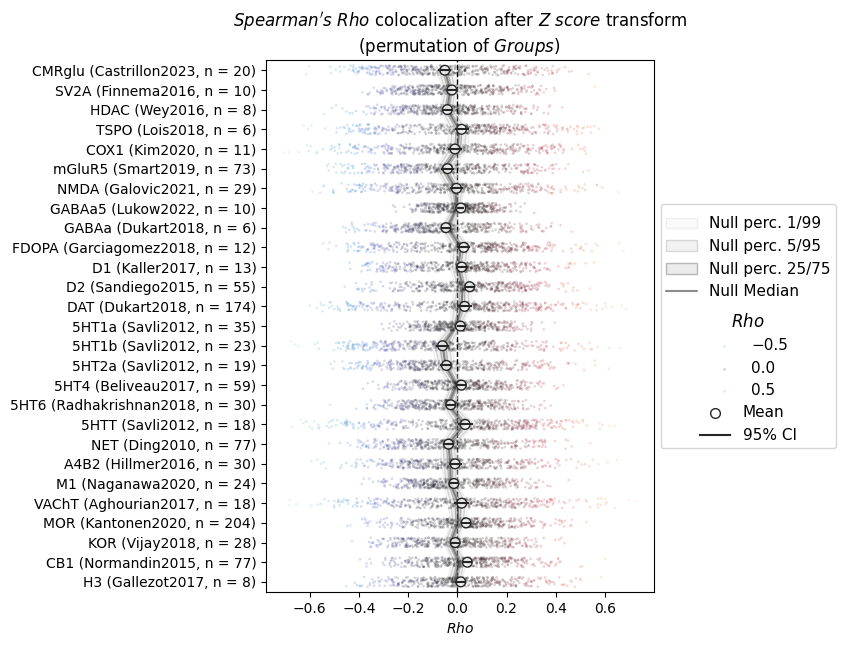

In [14]:
fig, ax, plot = nsp_object.plot("categorical")

## Simple X-set enrichment analysis

Gene-set enrichment analyses (GSEA) are "an old head" as we say in Germany (I actually have no idea, but I am confident that this means something else in English). They usually answer the question: "Is an input set of genes over-represented in one or more other sets of genes (e.g., markers of certain cell types or disorders) as compared to a much larger "background" gene set. 

For the neuroimaging and "colocalization" space, the concept was introduced (by others first, not my idea) as a way to test if a brain map is more correlated to the brain/cortex-wide distribution of a set of genes than to other random genes. We do exactly that here. However, we call this "XSEA" as I generalized the concept to any kind of reference map dataset that is sorted into sub-categories ("sets"). Therefore, `NiSpace` requires the input reference data have an at least 2d-multiindex with at least 2 levels: `"map"` and `"set"`. When `"mrna"` is the x dataframe, subset by a collection (automatically: cell type markers), the function will automatically use the full gene expression dataset as background.

We use the ENIGMA example data from above.

In [15]:
from nispace.workflows import simple_xsea

# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = simple_xsea(
    x="mrna",
    y=example_enigma,
    z=None, # don't control for anything on map-level
    parcellation="DesikanKilliany",
    colocalization_method="spearman", # can be any allowed method
    xsea_aggregation_method="mean",
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
)

INFO | 27/09/24 17:07:57 | nispace: Trying to fetch background X dataset.
INFO | 27/09/24 17:07:57 | nispace: Loading mrna maps.
INFO | 27/09/24 17:07:57 | nispace: Loading parcellated data: DesikanKilliany
INFO | 27/09/24 17:07:58 | nispace: Standardizing parcellated data.
The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 
2012 (https://doi.org/10.1038/nature11405). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 
six donors, mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


INFO | 27/09/24 17:07:58 | nispace: Using integrated parcellation DesikanKilliany.
INFO | 27/09/24 17:07:58 | nispace: Loading integrated mrna dataset as X data.
INFO | 27/09/24 17:07:58 | nispace: Using collection CellTypesPsychEn

Colocalizing (spearman, -1 proc): 100%|██████████| 1/1 [00:00<00:00, 1255.03it/s]

INFO | 27/09/24 17:07:59 | nispace: *** NiSpace.permute() - Estimate exact non-parametric p values. ***
INFO | 27/09/24 17:07:59 | nispace: Permutation of: X sets.
INFO | 27/09/24 17:07:59 | nispace: Loading observed colocalizations (method = 'spearman').
INFO | 27/09/24 17:07:59 | nispace: Generating permuted X sets.
INFO | 27/09/24 17:07:59 | nispace: Will use 7875 provided background maps.
INFO | 27/09/24 17:07:59 | nispace: Z-standardizing X background maps.



Null colocalizations (spearman, -1 proc): 100%|██████████| 10000/10000 [00:06<00:00, 1632.68it/s]


INFO | 27/09/24 17:08:06 | nispace: Calculating exact p-values (tails = {'rho': 'two'}).
INFO | 27/09/24 17:08:06 | nispace: *** NiSpace.correct_p() - Correct p values for multiple comparisons. ***
INFO | 27/09/24 17:08:06 | nispace: Returning colocalizations: 
| METHOD   | XSEA | X_REDUCTION | Y_TRANSFORM | 
| spearman | True | False       | False       | 
INFO | 27/09/24 17:08:06 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | sets         | True | None      | False | False       | False       | 
INFO | 27/09/24 17:08:06 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | sets         | True | fdrbh     | False | False       | False       | 


The results DataFrames will have as many columns as there are sets (about 20 for cell type collections), not as there are genes:

In [16]:
print("Spearman colocalizations after gene-set enrichment analysis")
display(colocs)

print("Set-permutation p-values of the colocalizations after gene-set enrichment analysis")
display(p_values)

Spearman colocalizations after gene-set enrichment analysis


,Adult-Ex1,Adult-Ex2,Adult-Ex3,Adult-Ex4,Adult-Ex5,Adult-Ex6,Adult-Ex7,Adult-Ex8,Adult-In1,Adult-In2,...,Adult-In7,Adult-In8,Adult-Astro,Adult-Endo,Dev-quiescent,Dev-replicating,Adult-Micro,Adult-OtherNeuron,Adult-OPC,Adult-Oligo
SCZ,-0.27482,-0.01609,-0.079143,-0.182517,-0.287303,0.117547,-0.055294,-0.062964,0.006299,-0.135345,...,-0.133608,0.000192,0.14634,0.06735,0.045274,0.050797,0.089824,-0.064512,0.031004,0.014578


Set-permutation p-values of the colocalizations after gene-set enrichment analysis


,Adult-Ex1,Adult-Ex2,Adult-Ex3,Adult-Ex4,Adult-Ex5,Adult-Ex6,Adult-Ex7,Adult-Ex8,Adult-In1,Adult-In2,...,Adult-In7,Adult-In8,Adult-Astro,Adult-Endo,Dev-quiescent,Dev-replicating,Adult-Micro,Adult-OtherNeuron,Adult-OPC,Adult-Oligo
SCZ,0.0001,0.936,0.4962,0.0154,0.0001,0.0006,0.746,0.3164,0.864,0.33,...,0.19,0.8688,0.0001,0.016,0.2714,0.1672,0.0346,0.3888,0.1618,0.5384


Let's plot the result for schizophrenia:

INFO | 27/09/24 17:08:06 | nispace: *** NiSpace.plot() - Plot colocalization results. ***
INFO | 27/09/24 17:08:07 | nispace: Creating categorical plot for method spearman, colocalization stat rho.


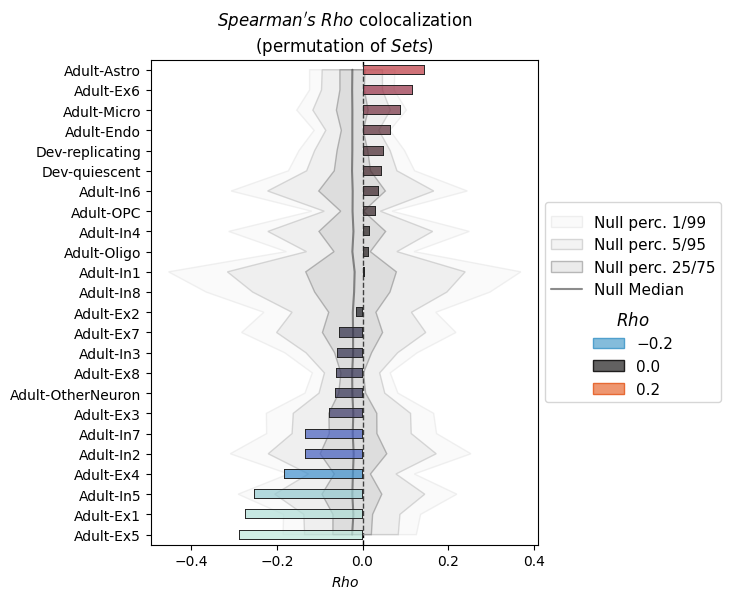

In [17]:
fig, ax, plot = nsp_object.plot("categorical", plot_kwargs={"sort_categories": True})